In [16]:
# Step 1: Import dependencies
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [17]:
# Step 2: Load and preprocess the dataset (MNIST)
# Load MNIST dataset (28x28 grayscale images)
(X_train, _), (_, _) = tf.keras.datasets.mnist.load_data()

# Normalize images to [-1, 1] for GAN training
X_train = (X_train.astype("float32") - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=-1)  # Add channel dimension

print("Dataset shape:", X_train.shape)

Dataset shape: (60000, 28, 28, 1)


In [18]:
# Step 3: Build Generator Model
def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(7*7*256, use_bias=False, input_shape=(latent_dim,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Reshape((7, 7, 256)),

        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding="same", use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding="same", use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding="same", use_bias=False, activation="tanh"),
    ])
    return model

In [19]:
# Step 4: Build Discriminator Model
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding="same", input_shape=[28, 28, 1]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Conv2D(128, (5, 5), strides=(2, 2), padding="same"),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1, activation="sigmoid"),
    ])
    return model

In [20]:
# Step 5: Compile Models
# Latent space dimension
latent_dim = 100

# Build models
generator = build_generator(latent_dim)
discriminator = build_discriminator()

# Compile discriminator
discriminator.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=["accuracy"]
)

# Build GAN (stacked model)
discriminator.trainable = False  # Freeze discriminator in GAN training
gan_input = tf.keras.Input(shape=(latent_dim,))
fake_image = generator(gan_input)
validity = discriminator(fake_image)
gan = tf.keras.Model(gan_input, validity)

gan.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(1e-4))

4/4 [==============================] - 0s 36ms/step
100 [D loss: 0.3807, acc.: 92.97] [G loss: 0.3654]
4/4 [==============================] - 0s 36ms/step
200 [D loss: 0.0178, acc.: 100.00] [G loss: 0.0006]
4/4 [==============================] - 0s 34ms/step
300 [D loss: 0.0160, acc.: 100.00] [G loss: 0.0038]
4/4 [==============================] - 0s 36ms/step
400 [D loss: 0.0375, acc.: 100.00] [G loss: 0.0050]
4/4 [==============================] - 0s 42ms/step
500 [D loss: 0.3220, acc.: 88.28] [G loss: 1.2325]
4/4 [==============================] - 0s 42ms/step
600 [D loss: 0.3766, acc.: 82.03] [G loss: 6.2487]
4/4 [==============================] - 0s 36ms/step
700 [D loss: 0.3444, acc.: 87.11] [G loss: 1.2538]
4/4 [==============================] - 0s 37ms/step
800 [D loss: 0.2831, acc.: 91.02] [G loss: 0.0774]
4/4 [==============================] - 0s 38ms/step
900 [D loss: 0.3485, acc.: 85.55] [G loss: 0.1768]
4/4 [==============================] - 0s 37ms/step
1000 [D loss: 0.77

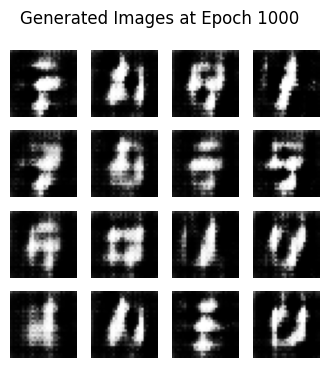

4/4 [==============================] - 0s 37ms/step
1100 [D loss: 0.9259, acc.: 47.66] [G loss: 1.1191]
4/4 [==============================] - 0s 38ms/step
1200 [D loss: 0.7383, acc.: 56.25] [G loss: 0.9060]
4/4 [==============================] - 0s 37ms/step
1300 [D loss: 0.5072, acc.: 78.52] [G loss: 0.6449]
4/4 [==============================] - 0s 38ms/step
1400 [D loss: 0.6838, acc.: 62.50] [G loss: 0.9534]
4/4 [==============================] - 0s 38ms/step
1500 [D loss: 0.6355, acc.: 67.97] [G loss: 0.6817]
4/4 [==============================] - 0s 36ms/step
1600 [D loss: 0.5603, acc.: 73.83] [G loss: 1.0587]
4/4 [==============================] - 0s 36ms/step
1700 [D loss: 0.5422, acc.: 75.78] [G loss: 0.8633]
4/4 [==============================] - 0s 36ms/step
1800 [D loss: 0.5886, acc.: 69.92] [G loss: 0.7777]
4/4 [==============================] - 0s 37ms/step
1900 [D loss: 0.5867, acc.: 69.14] [G loss: 0.8691]
4/4 [==============================] - 0s 37ms/step
2000 [D loss

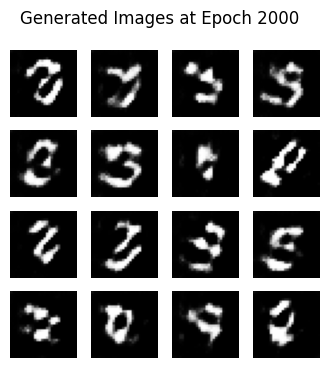

4/4 [==============================] - 0s 36ms/step
2100 [D loss: 0.6076, acc.: 68.36] [G loss: 0.8463]
4/4 [==============================] - 0s 40ms/step
2200 [D loss: 0.6140, acc.: 66.02] [G loss: 0.8149]
4/4 [==============================] - 0s 37ms/step
2300 [D loss: 0.6787, acc.: 62.50] [G loss: 0.8275]
4/4 [==============================] - 0s 36ms/step
2400 [D loss: 0.6649, acc.: 61.72] [G loss: 0.8326]
4/4 [==============================] - 0s 37ms/step
2500 [D loss: 0.6400, acc.: 63.67] [G loss: 0.7764]
4/4 [==============================] - 0s 37ms/step
2600 [D loss: 0.7531, acc.: 52.34] [G loss: 0.6420]
4/4 [==============================] - 0s 37ms/step
2700 [D loss: 0.7113, acc.: 54.30] [G loss: 0.7630]
4/4 [==============================] - 0s 40ms/step
2800 [D loss: 0.6087, acc.: 68.75] [G loss: 0.7873]
4/4 [==============================] - 0s 41ms/step
2900 [D loss: 0.7130, acc.: 55.08] [G loss: 0.7934]
4/4 [==============================] - 0s 38ms/step
3000 [D loss

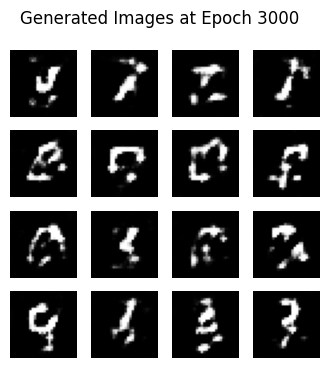

4/4 [==============================] - 0s 38ms/step
3100 [D loss: 0.6533, acc.: 61.33] [G loss: 0.8289]
4/4 [==============================] - 0s 38ms/step
3200 [D loss: 0.5827, acc.: 69.14] [G loss: 0.6724]
4/4 [==============================] - 0s 41ms/step
3300 [D loss: 0.5291, acc.: 80.86] [G loss: 0.8784]
4/4 [==============================] - 0s 37ms/step
3400 [D loss: 0.6073, acc.: 74.61] [G loss: 0.9570]
4/4 [==============================] - 0s 39ms/step
3500 [D loss: 0.6877, acc.: 54.69] [G loss: 0.7978]
4/4 [==============================] - 0s 41ms/step
3600 [D loss: 0.6769, acc.: 60.55] [G loss: 0.7870]
4/4 [==============================] - 0s 39ms/step
3700 [D loss: 0.5590, acc.: 73.83] [G loss: 0.9442]
4/4 [==============================] - 0s 39ms/step
3800 [D loss: 0.6761, acc.: 56.25] [G loss: 0.9332]
4/4 [==============================] - 0s 38ms/step
3900 [D loss: 0.7670, acc.: 48.44] [G loss: 0.7658]
4/4 [==============================] - 0s 40ms/step
4000 [D loss

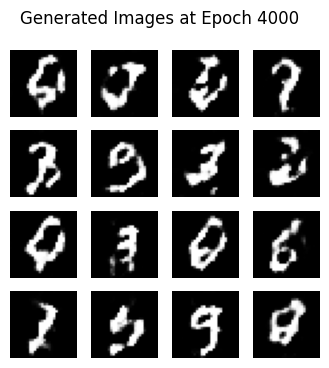

4/4 [==============================] - 0s 37ms/step
4100 [D loss: 0.4378, acc.: 85.16] [G loss: 0.9222]
4/4 [==============================] - 0s 39ms/step
4200 [D loss: 0.4723, acc.: 81.64] [G loss: 0.9378]
4/4 [==============================] - 0s 39ms/step
4300 [D loss: 0.6072, acc.: 67.19] [G loss: 0.8317]
4/4 [==============================] - 0s 39ms/step
4400 [D loss: 0.6839, acc.: 55.86] [G loss: 0.8569]
4/4 [==============================] - 0s 39ms/step
4500 [D loss: 0.6378, acc.: 60.55] [G loss: 0.9586]
4/4 [==============================] - 0s 39ms/step
4600 [D loss: 0.5697, acc.: 74.61] [G loss: 0.9301]
4/4 [==============================] - 0s 41ms/step
4700 [D loss: 0.6188, acc.: 68.75] [G loss: 1.0245]
4/4 [==============================] - 0s 59ms/step
4800 [D loss: 0.6163, acc.: 69.53] [G loss: 0.9516]
4/4 [==============================] - 0s 42ms/step
4900 [D loss: 0.6236, acc.: 62.89] [G loss: 0.8636]
4/4 [==============================] - 0s 41ms/step
5000 [D loss

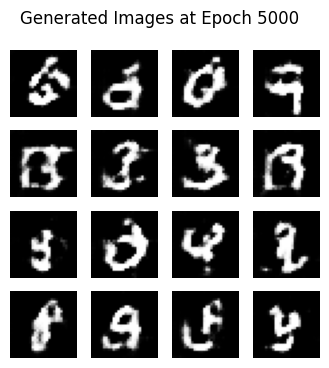

4/4 [==============================] - 0s 42ms/step
5100 [D loss: 0.6254, acc.: 62.50] [G loss: 0.9112]
4/4 [==============================] - 0s 44ms/step
5200 [D loss: 0.6259, acc.: 67.19] [G loss: 0.8341]
4/4 [==============================] - 0s 41ms/step
5300 [D loss: 0.6851, acc.: 58.98] [G loss: 0.7938]
4/4 [==============================] - 0s 40ms/step
5400 [D loss: 0.5058, acc.: 78.52] [G loss: 0.9671]
4/4 [==============================] - 0s 45ms/step
5500 [D loss: 0.4694, acc.: 80.08] [G loss: 0.8797]
4/4 [==============================] - 0s 40ms/step
5600 [D loss: 0.5773, acc.: 71.09] [G loss: 0.9239]
4/4 [==============================] - 0s 43ms/step
5700 [D loss: 0.4458, acc.: 85.55] [G loss: 1.0780]
4/4 [==============================] - 0s 40ms/step
5800 [D loss: 0.6623, acc.: 62.50] [G loss: 0.9645]
4/4 [==============================] - 0s 41ms/step
5900 [D loss: 0.7843, acc.: 48.83] [G loss: 0.8299]
4/4 [==============================] - 0s 44ms/step
6000 [D loss

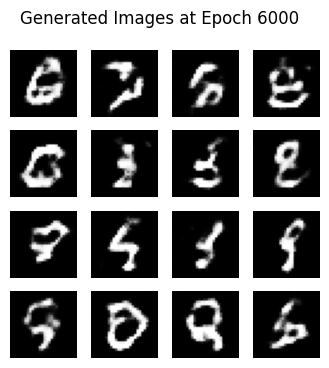

4/4 [==============================] - 0s 42ms/step
6100 [D loss: 0.5775, acc.: 71.88] [G loss: 0.9566]
4/4 [==============================] - 0s 43ms/step
6200 [D loss: 0.5906, acc.: 70.70] [G loss: 0.9349]
4/4 [==============================] - 0s 42ms/step
6300 [D loss: 0.5500, acc.: 75.78] [G loss: 0.9851]
4/4 [==============================] - 0s 42ms/step
6400 [D loss: 0.5014, acc.: 78.12] [G loss: 1.0635]
4/4 [==============================] - 0s 43ms/step
6500 [D loss: 0.6645, acc.: 60.94] [G loss: 0.8640]
4/4 [==============================] - 0s 45ms/step
6600 [D loss: 0.6164, acc.: 64.84] [G loss: 0.8290]
4/4 [==============================] - 0s 43ms/step
6700 [D loss: 0.5237, acc.: 76.95] [G loss: 0.9977]
4/4 [==============================] - 0s 44ms/step
6800 [D loss: 0.6086, acc.: 68.36] [G loss: 0.9595]
4/4 [==============================] - 0s 43ms/step
6900 [D loss: 0.6132, acc.: 67.58] [G loss: 0.9918]
4/4 [==============================] - 0s 44ms/step
7000 [D loss

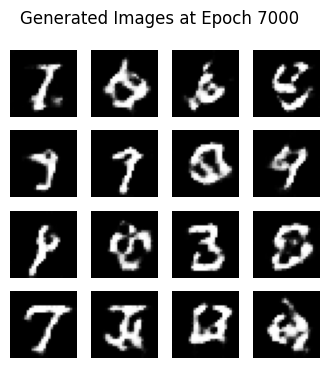

4/4 [==============================] - 0s 44ms/step
7100 [D loss: 0.6573, acc.: 62.11] [G loss: 0.9434]
4/4 [==============================] - 0s 44ms/step
7200 [D loss: 0.6518, acc.: 62.50] [G loss: 0.8710]
4/4 [==============================] - 0s 44ms/step
7300 [D loss: 0.6152, acc.: 66.80] [G loss: 0.8508]
4/4 [==============================] - 0s 45ms/step
7400 [D loss: 0.5664, acc.: 73.05] [G loss: 0.9826]
4/4 [==============================] - 0s 45ms/step
7500 [D loss: 0.5675, acc.: 71.88] [G loss: 0.9034]
4/4 [==============================] - 0s 46ms/step
7600 [D loss: 0.6894, acc.: 57.81] [G loss: 0.7580]
4/4 [==============================] - 0s 46ms/step
7700 [D loss: 0.7542, acc.: 48.83] [G loss: 0.7398]
4/4 [==============================] - 0s 46ms/step
7800 [D loss: 0.7638, acc.: 45.70] [G loss: 0.7631]
4/4 [==============================] - 0s 46ms/step
7900 [D loss: 0.6302, acc.: 64.84] [G loss: 0.8868]
4/4 [==============================] - 0s 47ms/step
8000 [D loss

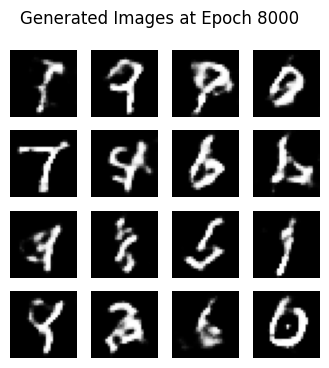

4/4 [==============================] - 0s 48ms/step
8100 [D loss: 0.6699, acc.: 60.16] [G loss: 0.8514]
4/4 [==============================] - 0s 48ms/step
8200 [D loss: 0.6624, acc.: 61.33] [G loss: 0.8164]
4/4 [==============================] - 0s 48ms/step
8300 [D loss: 0.6617, acc.: 58.98] [G loss: 0.7996]
4/4 [==============================] - 0s 48ms/step
8400 [D loss: 0.6515, acc.: 61.33] [G loss: 0.8605]
4/4 [==============================] - 0s 57ms/step
8500 [D loss: 0.6117, acc.: 66.80] [G loss: 0.7891]
4/4 [==============================] - 0s 57ms/step
8600 [D loss: 0.6750, acc.: 57.81] [G loss: 0.7230]
4/4 [==============================] - 0s 58ms/step
8700 [D loss: 0.6998, acc.: 58.59] [G loss: 0.7914]
4/4 [==============================] - 0s 59ms/step
8800 [D loss: 0.7118, acc.: 49.22] [G loss: 0.7774]
4/4 [==============================] - 0s 60ms/step
8900 [D loss: 0.6640, acc.: 63.28] [G loss: 0.7982]
4/4 [==============================] - 0s 61ms/step
9000 [D loss

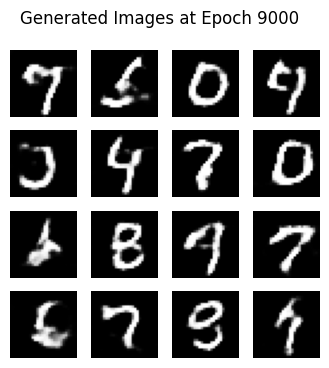

4/4 [==============================] - 0s 60ms/step
9100 [D loss: 0.6634, acc.: 58.98] [G loss: 0.8402]
4/4 [==============================] - 0s 61ms/step
9200 [D loss: 0.7029, acc.: 56.64] [G loss: 0.7612]
4/4 [==============================] - 0s 62ms/step
9300 [D loss: 0.6825, acc.: 59.38] [G loss: 0.7319]
4/4 [==============================] - 0s 62ms/step
9400 [D loss: 0.6151, acc.: 64.45] [G loss: 0.8708]
4/4 [==============================] - 0s 63ms/step
9500 [D loss: 0.5414, acc.: 78.52] [G loss: 0.9306]
4/4 [==============================] - 0s 65ms/step
9600 [D loss: 0.6163, acc.: 67.19] [G loss: 0.9502]
4/4 [==============================] - 0s 64ms/step
9700 [D loss: 0.7047, acc.: 54.30] [G loss: 0.8458]
4/4 [==============================] - 0s 64ms/step
9800 [D loss: 0.6693, acc.: 58.98] [G loss: 0.7617]
4/4 [==============================] - 0s 64ms/step
9900 [D loss: 0.6357, acc.: 63.67] [G loss: 0.8493]
4/4 [==============================] - 0s 66ms/step
10000 [D los

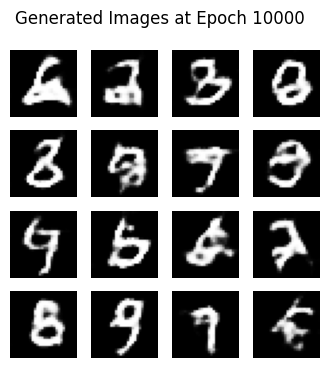

In [21]:
# Step 6: Train GAN
# Training parameters
epochs = 10000
batch_size = 128
sample_interval = 1000

# Labels for real and fake images
real_label = np.ones((batch_size, 1))
fake_label = np.zeros((batch_size, 1))

# Function to save generated images
def save_generated_images(epoch):
    noise = np.random.normal(0, 1, (16, latent_dim))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale to [0, 1]

    fig, axs = plt.subplots(4, 4, figsize=(4, 4))
    count = 0
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(gen_imgs[count, :, :, 0], cmap="gray")
            axs[i, j].axis("off")
            count += 1
    plt.suptitle(f"Generated Images at Epoch {epoch}")
    plt.show()

# Training loop
for epoch in range(1, epochs + 1):

    # Train Discriminator
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_imgs = X_train[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_imgs = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(real_imgs, real_label)
    d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_label)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, real_label)

    # Print progress
    if epoch % 100 == 0:
        print(f"{epoch} [D loss: {d_loss[0]:.4f}, acc.: {100*d_loss[1]:.2f}] [G loss: {g_loss:.4f}]")

    # Save generated images
    if epoch % sample_interval == 0:
        save_generated_images(epoch)


1/1 [==============================] - 0s 37ms/step
Generated images shape: (10, 28, 28, 1)


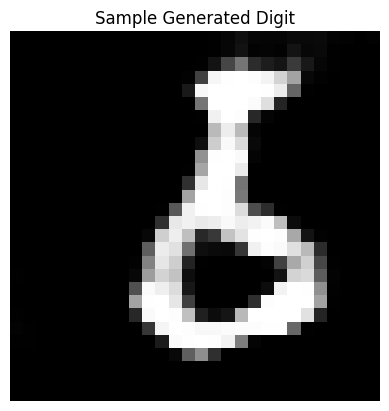

In [22]:
# Step 7: Evaluate GAN
# Generate some test images
test_noise = np.random.normal(0, 1, (10, latent_dim))
generated_images = generator.predict(test_noise)

print("Generated images shape:", generated_images.shape)

# Show one generated image
plt.imshow(generated_images[0, :, :, 0], cmap="gray")
plt.title("Sample Generated Digit")
plt.axis("off")
plt.show()
